<a href="https://colab.research.google.com/github/Nuzhattttt/braintumor/blob/main/Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from PIL import Image


In [ ]:

# train_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Training'
# test_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Testing'

In [ ]:

train_directory = '/content/gdrive/MyDrive/Dataset/Training'
test_directory = '/content/gdrive/MyDrive/Dataset/Testing'

In [ ]:
image_size = (299, 299)
train_images = []
train_labels = []
test_images = []
test_labels = []

In [ ]:
def load_and_preprocess_images(directory, images_list, labels_list):
    for class_name in os.listdir(directory):
        class_directory = os.path.join(directory, class_name)

        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path).convert("RGB")
                image = image.resize(image_size, Image.LANCZOS)
                images_list.append(image)
                labels_list.append(class_name)


In [ ]:
load_and_preprocess_images(train_directory, train_images, train_labels)


In [ ]:
load_and_preprocess_images(test_directory, test_images, test_labels)


In [ ]:
label_encoder = LabelEncoder()

train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)


In [ ]:
# # Assuming your images are in RGB format
# X_train = X_train.reshape(-1, 224, 224, 3)
# X_test = X_test.reshape(-1, 224, 224, 3)


In [ ]:
# image_size = (224, 224)

# # Reshape and resize the images
# X_train = np.array([np.array(img.resize(image_size)) for img in train_images])
# X_test = np.array([np.array(img.resize(image_size)) for img in test_images])

In [ ]:
from keras.utils import to_categorical

In [ ]:
label_encoder = LabelEncoder()

train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)


In [ ]:
from keras.utils import to_categorical

In [ ]:
# label_encoder = LabelEncoder()
num_classes = 4
y_train = to_categorical(train_encoded_labels, num_classes=num_classes)
y_test = to_categorical(test_encoded_labels, num_classes=num_classes)

# train_encoded_labels = label_encoder.fit_transform(train_labels)
# test_encoded_labels = label_encoder.transform(test_labels)

In [ ]:
X_train = np.array([np.array(img) for img in train_images])
y_train = np.array(train_encoded_labels)
X_test = np.array([np.array(img) for img in test_images])
y_test = np.array(test_encoded_labels)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5712, 299, 299, 3)
y_train shape: (5712,)
X_test shape: (1311, 299, 299, 3)
y_test shape: (1311,)


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import time
from keras.layers import Activation
from keras.layers import Dropout


In [ ]:

num_classes = 4
model = Sequential()
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()# build the network
model = Sequential()
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (299, 299, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 297, 297, 32)      896       
                                                                 
 activation (Activation)     (None, 297, 297, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 146, 146, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                  

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))





In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from keras.applications.inception_v3 import decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

inc = InceptionV3(weights='imagenet', include_top=True)
inc.summary()

96112376/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d_8[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation_12 (Activa

In [ ]:
# make a reference to MobileNets's input layer
inp = inc.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in MobileNets, and make a reference to it
out = new_classification_layer(inc.layers[-2].output)

# create a new network between inp and out
model_inc = Model(inp, out)

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_inc.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_inc.layers[-1:]):
    layer.trainable = True

model_inc.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_inc.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d_8[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation_12 (Activation)  (None, 149, 149, 32)         0         ['batch_normalization[0][0

In [ ]:
history8 = model_inc.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                         batch_size=128,
                         epochs=50,
                         validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))

Epoch 1/50
45/45 [==============================] - 57s 833ms/step - loss: 2.9472 - accuracy: 0.4879 - val_loss: 2.0939 - val_accuracy: 0.5873
Epoch 2/50
45/45 [==============================] - 23s 515ms/step - loss: 1.2610 - accuracy: 0.6418 - val_loss: 1.3481 - val_accuracy: 0.6369
Epoch 3/50
45/45 [==============================] - 22s 497ms/step - loss: 0.9208 - accuracy: 0.7020 - val_loss: 1.2424 - val_accuracy: 0.6651
Epoch 4/50
45/45 [==============================] - 23s 525ms/step - loss: 0.8009 - accuracy: 0.7311 - val_loss: 0.9106 - val_accuracy: 0.7124
Epoch 5/50
45/45 [==============================] - 23s 507ms/step - loss: 0.7093 - accuracy: 0.7568 - val_loss: 0.9156 - val_accuracy: 0.7117
Epoch 6/50
45/45 [==============================] - 24s 534ms/step - loss: 0.7204 - accuracy: 0.7602 - val_loss: 0.8005 - val_accuracy: 0.7506
Epoch 7/50
45/45 [==============================] - 24s 534ms/step - loss: 0.6218 - accuracy: 0.7876 - val_loss: 0.7107 - val_accuracy: 0.7803

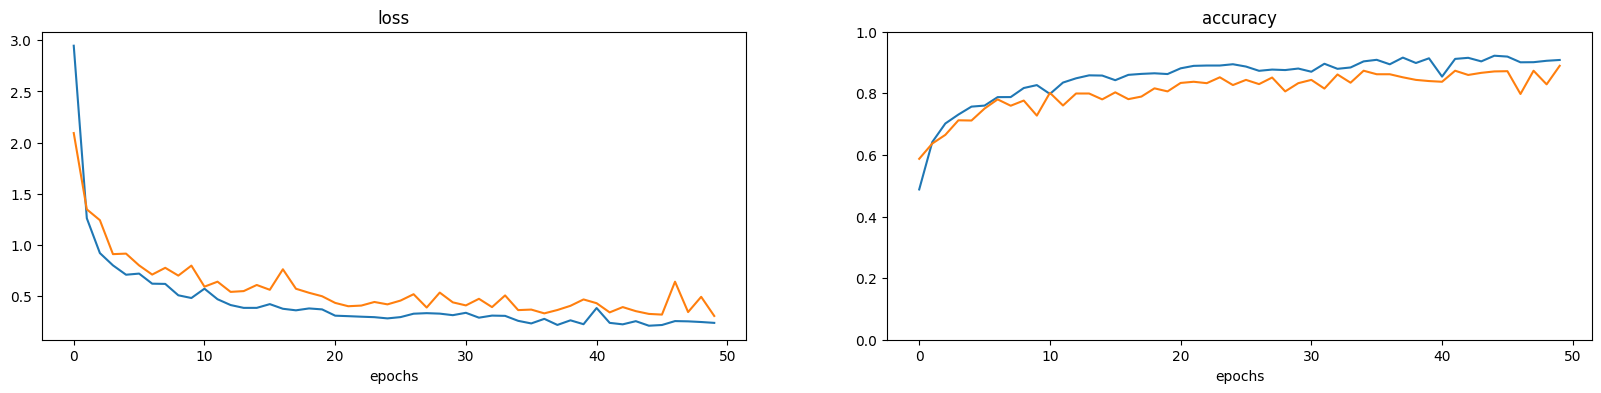

In [ ]:
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.plot(history8.history["loss"])
ax.plot(history8.history["val_loss"])
ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history8.history["accuracy"])
ax2.plot(history8.history["val_accuracy"])
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model_inc.evaluate(X_test,to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.30634328722953796
Test accuracy: 0.889397382736206


In [ ]:
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Assuming you have trained the model and have test data X_test, test_encoded_labels
predictions = model_inc.predict(X_test)

# Convert predictions and test labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(to_categorical(test_encoded_labels, num_classes=num_classes), axis=1)



41/41 [==============================] - 6s 110ms/step


In [ ]:

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       300
           1       0.83      0.73      0.77       306
           2       0.95      1.00      0.97       405
           3       0.93      0.94      0.94       300

    accuracy                           0.89      1311
   macro avg       0.88      0.88      0.88      1311
weighted avg       0.89      0.89      0.89      1311



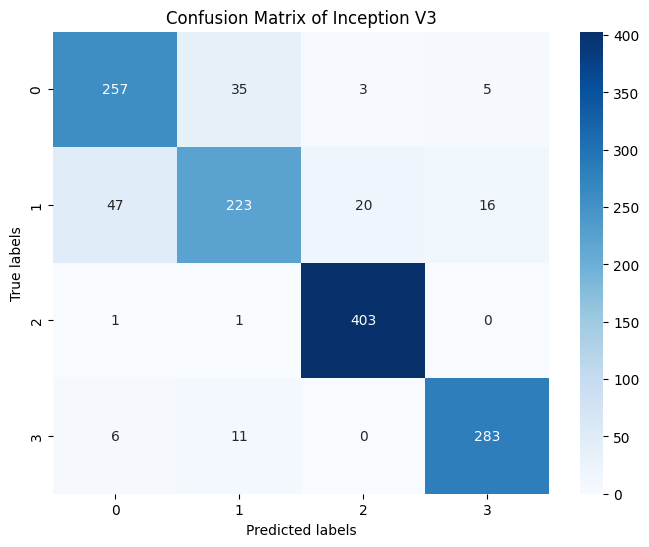

In [ ]:


# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of Inception V3')
plt.show()